In [1]:
#https://medium.com/@tattwei46/how-to-use-python-with-mysql-79304bee8753
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="root",
  database="mydatabase"
)

import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

mycursor = mydb.cursor()

#mycursor.execute("CREATE TABLE sondage (id INT AUTO_INCREMENT PRIMARY KEY, name VARCHAR(255), address VARCHAR(255), sex VARCHAR(255), infection VARCHAR(255), fumeur VARCHAR(255), fastfood VARCHAR(255), alcohol VARCHAR(255))")

In [2]:
#SONDAGE
name = input("Comment tu t'appelles ? ")
address = input("Quel est ton adresse ? ")
sex = input("Quel est ton genre ? ")
infection = input("Ta colopathie a-t-elle commencé par une infection ? ")
fumeur = input("A quel point tu manges déséquilibré entre 0 et 3 ? ")
fastfood = input("A quel point tu fumes entre 0 et 3 ? ")
alcohol = input("A quel point tu bois entre 0 et 3 ? ")
print(name)
print(address)
print(sex)
print(infection)
print(fumeur)
print(fastfood)
print(alcohol)

Comment tu t'appelles ? luk
Quel est ton adresse ? jm
Quel est ton genre ? hl
Ta colopathie a-t-elle commencé par une infection ? 1
A quel point tu manges déséquilibré entre 0 et 3 ? 1
A quel point tu fumes entre 0 et 3 ? 1
A quel point tu bois entre 0 et 3 ? 1
luk
jm
hl
1
1
1
1


In [3]:
#VALIDER
def valider():
    sql = "INSERT INTO sondage (name, address, sex, infection, fumeur, fastfood, alcohol) VALUES (%s, %s, %s, %s, %s, %s, %s)"
    val = (name, address, sex, infection, fumeur, fastfood, alcohol)
    mycursor.execute(sql, val)

    mydb.commit()

    print(mycursor.rowcount, "record(s) inserted.")
valider()

1 record(s) inserted.


In [6]:
#AFFICHER

def afficher():
    sql = "SELECT * FROM sondage"
    mycursor.execute(sql)
    myresult = mycursor.fetchall()
    for x in myresult:
        print(x)
#afficher()

In [7]:
#SUPPRIMER
def supprimer():
    sql = "DELETE FROM sondage WHERE infection = %s"
    adr = ("0", )
    mycursor.execute(sql, adr)
    mydb.commit()
    print(mycursor.rowcount, "record(s) deleted.")

In [8]:
#AJOUTER PLUSIEURS
def ajouter():
    sql = "INSERT INTO sondage (name, address, sex, infection, fumeur, fastfood, alcohol) VALUES (%s, %s, %s, %s, %s, %s, %s)"
    val = [
        ("Lily", "California", "Feminin", "oui", "0", "3", "2"),
        ("David", "San Francisco", "Masculin", "non", "0", "0", "2"),
        ("Micheal", "Las Vegas", "Masculin", "oui", "0", "3", "1"),
        ("Sarah", "New York", "Feminin", "non", "2", "1", "0")
    ]
    mycursor.executemany(sql, val)
    mydb.commit()
    print(mycursor.rowcount, "record(s) inserted.")

In [9]:
sql = "SELECT * FROM sondage"
mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
    print(x)
dfresu = pd.DataFrame(myresult, columns=['num', 'nom', 'address', 'genre', 'infection', 'fumeur', 'fastfood', 'alcool']) 

(22, 'Lily', 'California', 'Feminin', 'oui', '0', '3', '2')
(23, 'David', 'San Francisco', 'Masculin', 'non', '0', '0', '2')
(24, 'Micheal', 'Las Vegas', 'Masculin', 'oui', '0', '3', '1')
(25, 'Sarah', 'New York', 'Feminin', 'non', '2', '1', '0')
(26, 'paul', 'paris', 'masculin', 'oui', '0', '0', '0')
(28, 'Lily', 'California', 'Feminin', 'oui', '0', '3', '2')
(29, 'David', 'San Francisco', 'Masculin', 'non', '0', '0', '2')
(30, 'Micheal', 'Las Vegas', 'Masculin', 'oui', '0', '3', '1')
(31, 'Sarah', 'New York', 'Feminin', 'non', '2', '1', '0')
(32, 'dider', 'bordeaux', 'masculin', 'non', '2', '1', '0')
(33, 'mike', 'paris', 'masculin', 'oui', '2', '3', '3')
(34, 'jerome', 'lille', 'masculin', 'oui', '0', '1', '1')
(35, 'sdf', 'sdf', 'masculin', 'non', '0', '0', '0')
(36, 'sdf', 'sdf', 'masculin', 'non', '0', '0', '0')
(37, 'luk', 'jm', 'hl', '1', '1', '1', '1')


In [10]:
df2 = dfresu.rename({0: 'num', 1: 'nom', 2: 'address', 3: 'genre', 4: 'infection', 5: 'fumeur', 6: 'fastfood', 7: 'alcool'}, axis=1)

In [11]:
df2['fumeur'] = df2['fumeur'].astype(float)
df2['fastfood'] = df2['fastfood'].astype(float)
df2['alcool'] = df2['alcool'].astype(float)

In [12]:
del df2['num']

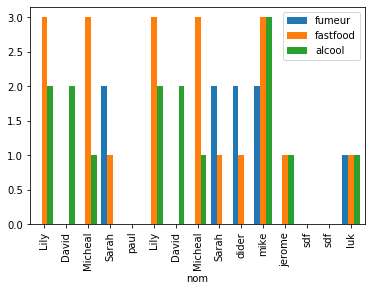

In [13]:
df2.plot.bar(x='nom', width=0.8)

In [14]:
afficher()

(22, 'Lily', 'California', 'Feminin', 'oui', '0', '3', '2')
(23, 'David', 'San Francisco', 'Masculin', 'non', '0', '0', '2')
(24, 'Micheal', 'Las Vegas', 'Masculin', 'oui', '0', '3', '1')
(25, 'Sarah', 'New York', 'Feminin', 'non', '2', '1', '0')
(26, 'paul', 'paris', 'masculin', 'oui', '0', '0', '0')
(28, 'Lily', 'California', 'Feminin', 'oui', '0', '3', '2')
(29, 'David', 'San Francisco', 'Masculin', 'non', '0', '0', '2')
(30, 'Micheal', 'Las Vegas', 'Masculin', 'oui', '0', '3', '1')
(31, 'Sarah', 'New York', 'Feminin', 'non', '2', '1', '0')
(32, 'dider', 'bordeaux', 'masculin', 'non', '2', '1', '0')
(33, 'mike', 'paris', 'masculin', 'oui', '2', '3', '3')
(34, 'jerome', 'lille', 'masculin', 'oui', '0', '1', '1')
(35, 'sdf', 'sdf', 'masculin', 'non', '0', '0', '0')
(36, 'sdf', 'sdf', 'masculin', 'non', '0', '0', '0')
(37, 'luk', 'jm', 'hl', '1', '1', '1', '1')
